<h1 align='center' style="color:#ff6600; font-size:40px ">🐵Monkey Pox🐵</h1>

<hr >
<h1>
    <a id='Back_to_Top'></a>
</h1>

<h2 style="color:#0066ff ">Table of Content</h2>

*  [About Dataset](#About_Dataset)
*  [Import Libraries](#Import_Libraries)
*  [Import Datasets](#Import_Datasets)
*  [Dataset Cleaning](#Dataset_Cleaning)
*  [Feature Engineering](#Feature_Engineering)
*  [Data Analysis](#Data_Analysis)
    *  [Increase of Monkeypox cases in world](#Increase_of_Monkeypox)
    *  [Top 10 country in confirmed case count](#confirmed_case_count)
    *  [Top 10 country in suspected case count](#suspected_case_count)
    *  [Top 10 country based on Hospitalized](#based_on_Hospitalized)
    *  [Top 10 country based on Travel_History_Yes](#Travel_History_Yes)
    *  [op 10 country based on Travel_History_No](#Travel_History_No)
    *  [Confirmed Cases Across the World](#Across_the_World)
    *  [Symptoms Monkeypox Infected People Facing](#Infected_People_Facing)
*  [Reference](#Reference)
*  [Thank you note](#Thank_you)

<h1></h1>

<a id='About_Dataset'></a>
<h2 style="color:#0066ff ">About Dataset</h2>


### Context

Monkeypox is an infectious disease caused by the monkeypox virus that can occur in certain animals, including humans. Symptoms begin with fever, headache, muscle pains, swollen lymph nodes, and feeling tired.

An ongoing outbreak of monkeypox was confirmed on 6 May 2022, beginning with a British resident who, after traveling to Nigeria (where the disease is endemic), presented symptoms consistent with monkeypox on 29 April 2022. The resident returned to the United Kingdom on 4 May, creating the country's index case of the outbreak.

### Content
*  File 1 : Monkey_Pox_Cases_Worldwide
   Description : This dataset contains a tally of confirmed and suspected cases in all the countries.

*  File 2 : Worldwide_Case_Detection_Timeline
   Description : This dataset contains the timeline for confirmed cases w.r.t. date time, it also contains some other details on                  every case that is being reported.

*  File 3 : Daily_Country_Wise_Conformed_Cases
   Description : This dataset contains the daily number of confirmed cases for all the countries where the virus has entered.

<h1></h1>

<a id='Import_Libraries'></a>
<h2 style="color:#0066ff ">Import Libraries</h2>

In [237]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from wordcloud import WordCloud

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

<h1></h1>

<a id='Import_Datasets'></a>
<h2 style="color:#0066ff ">Import Datasets</h2>

In [6]:
df1 = pd.read_csv('Daily_Country_Wise_Confirmed_Cases.csv')
df2 = pd.read_csv('Monkey_Pox_Cases_Worldwide.csv')
df3 = pd.read_csv('Worldwide_Case_Detection_Timeline.csv')

<h1></h1>

<a id='Dataset_Cleaning'></a>
<h2 style="color:#0066ff ">Dataset Cleaning</h2>

<h3 style="color:#cc3300">Daily_Country_Wise_Confirmed_Cases.csv</h3>`

In [9]:
df1.head()

,Country,2022-01-31,2022-02-19,2022-02-28,2022-03-31,2022-04-10,2022-04-12,2022-04-30,2022-05-06,2022-05-12,...,2022-07-06,2022-07-07,2022-07-08,2022-07-09,2022-07-10,2022-07-11,2022-07-12,2022-07-13,2022-07-14,2022-07-15
0,Nigeria,3,0,1,6,0,0,5,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Cameroon,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Central African Republic,0,0,0,0,6,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Republic of Congo,0,0,0,0,0,2,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,England,0,0,0,0,0,0,0,1,1,...,0,197,0,0,0,178,0,0,0,118


In [23]:
df1.columns

Index(['Country', '2022-01-31', '2022-02-19', '2022-02-28', '2022-03-31',
       '2022-04-10', '2022-04-12', '2022-04-30', '2022-05-06', '2022-05-12',
       '2022-05-13', '2022-05-15', '2022-05-17', '2022-05-18', '2022-05-19',
       '2022-05-20', '2022-05-21', '2022-05-22', '2022-05-23', '2022-05-24',
       '2022-05-25', '2022-05-26', '2022-05-27', '2022-05-28', '2022-05-29',
       '2022-05-30', '2022-05-31', '2022-06-01', '2022-06-02', '2022-06-03',
       '2022-06-04', '2022-06-05', '2022-06-06', '2022-06-07', '2022-06-08',
       '2022-06-09', '2022-06-10', '2022-06-11', '2022-06-12', '2022-06-13',
       '2022-06-14', '2022-06-15', '2022-06-16', '2022-06-17', '2022-06-18',
       '2022-06-19', '2022-06-20', '2022-06-21', '2022-06-22', '2022-06-23',
       '2022-06-24', '2022-06-25', '2022-06-26', '2022-06-27', '2022-06-28',
       '2022-06-29', '2022-06-30', '2022-07-01', '2022-07-02', '2022-07-03',
       '2022-07-04', '2022-07-05', '2022-07-06', '2022-07-07', '2022-07-08',
  

In [27]:
# checking if any null value
df1.isna().values.sum()

0

In [18]:
df1.shape # shape of the dataset

(71, 72)

In [17]:
# checking if any duplicate 
df1.duplicated(keep=False).sum()

0

#### Daily_Country_Wise_Confirmed_Cases.csv is all clear

<h3 style="color:#cc3300">Monkey_Pox_Cases_Worldwide.csv</h3>

In [28]:
df2.head()

,Country,Confirmed_Cases,Suspected_Cases,Hospitalized,Travel_History_Yes,Travel_History_No
0,England,1778.0,0.0,5.0,2.0,7.0
1,Portugal,515.0,0.0,0.0,0.0,34.0
2,Spain,2447.0,0.0,11.0,2.0,0.0
3,United States,1464.0,0.0,4.0,26.0,5.0
4,Canada,478.0,7.0,1.0,2.0,0.0


In [30]:
df2.Country.unique()

array(['England', 'Portugal', 'Spain', 'United States', 'Canada',
       'Sweden', 'Italy', 'France', 'Belgium', 'Australia', 'Germany',
       'Netherlands', 'Israel', 'Switzerland', 'Greece', 'Austria',
       'Argentina', 'Denmark', 'Morocco', 'Slovenia', 'Scotland',
       'Czech Republic', 'United Arab Emirates', 'Finland', 'Wales',
       'Northern Ireland', 'Sudan', 'Bolivia', 'Iran', 'Ecuador', 'Malta',
       'Ireland', 'Mexico', 'Pakistan', 'French Guiana', 'Thailand',
       'Peru', 'Brazil', 'Malaysia', 'Hungary', 'Norway', 'Paraguay',
       'Costa Rica', 'Gibraltar', 'Mauritius', 'Haiti', 'Uruguay',
       'Latvia', 'Cayman Islands', 'Kosovo', 'Turkey', 'Bahamas', 'Ghana',
       'India', 'Iceland', 'Poland', 'Bangladesh', 'Uganda', 'Cambodia',
       'Malawi', 'Venezuela', 'Romania', 'Georgia', 'Slovakia',
       'Luxembourg', 'Nepal', 'Chile', 'Serbia', 'Lebanon', 'South Korea',
       'Singapore', 'South Africa', 'Taiwan', 'Colombia', 'Croatia',
       'Bulgaria', 'Som

In [37]:
df2.shape

(96, 6)

In [36]:
len(df2['Country'].unique()) # total country

96

In [35]:
# checking if any null value
df2.isna().values.sum()

0

<h3 style="color:#cc3300">Worldwide_Case_Detection_Timeline.csv</h3>

In [39]:
df3.head()

,Date_confirmation,Country,City,Age,Gender,Symptoms,Hospitalised (Y/N/NA),Isolated (Y/N/NA),Travel_history (Y/N/NA)
0,2022-01-31,Nigeria,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2022-01-31,Nigeria,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2022-01-31,Nigeria,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2022-02-19,Cameroon,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2022-02-28,Nigeria,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [40]:
df3.shape

(12029, 9)

In [43]:
df3[df3['Symptoms'].notna()]

,Date_confirmation,Country,City,Age,Gender,Symptoms,Hospitalised (Y/N/NA),Isolated (Y/N/NA),Travel_history (Y/N/NA)
24,2022-05-06,England,London,NaN,NaN,rash,Y,Y,Y
25,2022-05-12,England,London,NaN,NaN,rash,Y,Y,N
26,2022-05-13,England,London,NaN,NaN,vesicular rash,N,Y,N
27,2022-05-15,England,Newcastle,NaN,male,vesicular rash,Y,Y,Y
28,2022-05-15,England,London,NaN,male,vesicular rash,Y,Y,N
...,...,...,...,...,...,...,...,...,...
10876,2022-07-13,Singapore,NaN,45-49,male,"Rashes in the perianal region, fever",NaN,NaN,NaN
11079,2022-07-13,Argentina,NaN,30-34,NaN,mild symptoms,NaN,Y,Y
11080,2022-07-13,Argentina,NaN,25-29,NaN,"fever, headache, myalgia, asthenia, postules a...",NaN,Y,Y
11105,2022-07-13,Argentina,NaN,40-44,NaN,characteristic symptoms of Monkeypox,NaN,Y,Y


In [50]:
df3.isna().sum()

Date_confirmation              0
Country                        0
City                       11354
Age                        10354
Gender                     10682
Symptoms                   11903
Hospitalised (Y/N/NA)      11852
Isolated (Y/N/NA)          11751
Travel_history (Y/N/NA)    11791
dtype: int64

#### I can see more the 90% percent of the data is null in City, Age, Gender, Symptoms, Hospitalised (Y/N/NA), Isolated (Y/N/NA), Travel_history (Y/N/NA) so here I will not delete as I will create the different tables using this table to extract some valuable insight 

<h1></h1>

<a id='Feature_Engineering'></a>
<h2 style="color:#0066ff ">Feature Engineering</h2>

<h3 style="color:#cc3300">Daily_Country_Wise_Confirmed_Cases.csv</h3>`

In [53]:
df1.head()

,Country,2022-01-31,2022-02-19,2022-02-28,2022-03-31,2022-04-10,2022-04-12,2022-04-30,2022-05-06,2022-05-12,...,2022-07-06,2022-07-07,2022-07-08,2022-07-09,2022-07-10,2022-07-11,2022-07-12,2022-07-13,2022-07-14,2022-07-15
0,Nigeria,3,0,1,6,0,0,5,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Cameroon,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Central African Republic,0,0,0,0,6,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Republic of Congo,0,0,0,0,0,2,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,England,0,0,0,0,0,0,0,1,1,...,0,197,0,0,0,178,0,0,0,118


#### Thinking to create a new entry as World which will have the total count of all the row for particular columns and also the column Total_case which will tell us the total case in each country

In [83]:
new_row = {'Country': 'World'}
for i in df1.columns[1:]:
    new_row[i] = df1[i].sum()

In [87]:
df1 = df1.append(new_row, ignore_index=True)

In [88]:
df1

,Country,2022-01-31,2022-02-19,2022-02-28,2022-03-31,2022-04-10,2022-04-12,2022-04-30,2022-05-06,2022-05-12,...,2022-07-06,2022-07-07,2022-07-08,2022-07-09,2022-07-10,2022-07-11,2022-07-12,2022-07-13,2022-07-14,2022-07-15
0,Nigeria,3,0,1,6,0,0,5,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Cameroon,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Central African Republic,0,0,0,0,6,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Republic of Congo,0,0,0,0,0,2,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,England,0,0,0,0,0,0,0,1,1,...,0,197,0,0,0,178,0,0,0,118
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67,Russia,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
68,Bosnia And Herzegovina,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
69,Saudi Arabia,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
70,India,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


#### new row addition complete

In [142]:
df1['Total_case'] = df1['Country'].apply(lambda x:df1[df1['Country'] ==x].values[0][1:].sum())

In [143]:
df1

,Country,2022-01-31,2022-02-19,2022-02-28,2022-03-31,2022-04-10,2022-04-12,2022-04-30,2022-05-06,2022-05-12,...,2022-07-07,2022-07-08,2022-07-09,2022-07-10,2022-07-11,2022-07-12,2022-07-13,2022-07-14,2022-07-15,Total_case
0,Nigeria,3,0,1,6,0,0,5,0,0,...,0,0,0,0,0,0,0,0,0,62
1,Cameroon,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3
2,Central African Republic,0,0,0,0,6,0,0,0,0,...,0,0,0,0,0,0,0,0,0,8
3,Republic of Congo,0,0,0,0,0,2,0,0,0,...,0,0,0,0,0,0,0,0,0,2
4,England,0,0,0,0,0,0,0,1,1,...,197,0,0,0,178,0,0,0,118,1778
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67,Russia,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
68,Bosnia And Herzegovina,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
69,Saudi Arabia,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
70,India,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1


#### new column Total_case complete

<h3 style="color:#cc3300">Monkey_Pox_Cases_Worldwide.csv</h3>

In [92]:
df2

,Country,Confirmed_Cases,Suspected_Cases,Hospitalized,Travel_History_Yes,Travel_History_No
0,England,1778.0,0.0,5.0,2.0,7.0
1,Portugal,515.0,0.0,0.0,0.0,34.0
2,Spain,2447.0,0.0,11.0,2.0,0.0
3,United States,1464.0,0.0,4.0,26.0,5.0
4,Canada,478.0,7.0,1.0,2.0,0.0
...,...,...,...,...,...,...
91,Central African Republic,8.0,17.0,0.0,0.0,0.0
92,Republic of Congo,2.0,7.0,0.0,0.0,0.0
93,Cameroon,3.0,30.0,0.0,0.0,0.0
94,Liberia,0.0,4.0,0.0,0.0,0.0


#### Creating one function to get the top 10 out of this dataset

In [218]:
def top_10_plots(col=None):
    df_sorted = df2.sort_values(by=col,ascending=False).reset_index()
    top10 = df_sorted[:10]
    label_text = ' '.join(col.split('_'))
    fig = px.bar(x='Country',
                 y=col,
                 data_frame=top10,
                 color=col,
                 labels=['Country',label_text],
                 color_continuous_scale='electric',
                 text_auto=True,
                 title=f'Top 10 Countries based on {label_text}')
    fig.show()

<h3 style="color:#cc3300">Worldwide_Case_Detection_Timeline.csv</h3>

In [91]:
df3

,Date_confirmation,Country,City,Age,Gender,Symptoms,Hospitalised (Y/N/NA),Isolated (Y/N/NA),Travel_history (Y/N/NA)
0,2022-01-31,Nigeria,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2022-01-31,Nigeria,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2022-01-31,Nigeria,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2022-02-19,Cameroon,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2022-02-28,Nigeria,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
12024,2022-07-15,England,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12025,2022-07-15,England,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12026,2022-07-15,England,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12027,2022-07-15,England,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### No Feature Engineering required for me

<h1></h1>

<a id='Data_Analysis'></a>
<h2 style="color:#0066ff">Data Analysis</h2>

<a id='Increase_of_Monkeypox'></a>
<h3 style="color:#cc3300">Increase of Monkeypox cases in world</h3>

In [185]:
date = list(df1[-1:].columns[1:-1])
case = list(df1[-1:].values[0][1:-1])
mean_case = []
for i in range(1, len(case)+1):
    mean_case.append(sum(case[:i])/i)

fig = px.line()
# fig = px.line(x=date, y=case,name='total case')
fig.add_scatter(x=date, y=case,mode='lines',name='total case')
fig.add_scatter(x=date, y=mean_case,mode='lines',name='mean case')
fig.update_layout(
    title_text='Increase of monkeypox cases',
    xaxis_title="Date",
    yaxis_title="Cases"
)

<a id='confirmed_case_count'></a>
<h3 style="color:#cc3300">Top 10 country in confirmed case count</h3>

In [198]:
top_10_plots(col='Confirmed_Cases')

#### Top 10 Country with confirmed cases
*  Intrestingly most of them are Developed Countries

<a id='suspected_case_count'></a>
<h3 style="color:#cc3300">Top 10 country in suspected case count</h3>

In [199]:
top_10_plots(col="Suspected_Cases")

#### Democratic Republic of The Congo have the highest no. of suspected cases 
*  Interestingly most of the country are in Africa Continent

<a id='based_on_Hospitalized'></a>
<h3 style="color:#cc3300">Top 10 country based on Hospitalized</h3>

In [214]:
top_10_plots(col='Hospitalized')

<a id='Travel_History_Yes'></a>
<h3 style="color:#cc3300">Top 10 country based on Travel_History_Yes</h3>

In [216]:
top_10_plots(col='Travel_History_Yes')

#### America tops this list 

<a id='Travel_History_No'></a>
<h3 style="color:#cc3300">Top 10 country based on Travel_History_No</h3>

In [219]:
top_10_plots(col='Travel_History_No')

In [220]:
df2[df2['Country']=='Portugal']

,Country,Confirmed_Cases,Suspected_Cases,Hospitalized,Travel_History_Yes,Travel_History_No
1,Portugal,515.0,0.0,0.0,0.0,34.0


#### Portugal this list 
*  Interestingly there are 0 case with Travel_History_Yes but confirmed cases are 515 and Travel_History_No with 34 cases


<a id='Across_the_World'></a>
<h3 style="color:#cc3300">Confirmed Cases Across the World</h3>

In [225]:
fig = px.choropleth(df2,
                  locations='Country',
                  locationmode='country names',
                  hover_name='Country',
                  color='Confirmed_Cases',
                  color_continuous_scale='electric')

fig.update_layout(title_text='Confirmed Cases Across the World')

<a id='Infected_People_Facing'></a>
<h3 style="color:#cc3300">Symptoms Monkeypox Infected People Facing</h3>

In [248]:
list(df3['Symptoms'].unique())[1:]

['rash',
 'vesicular rash',
 'skin lesions, ulcerative lesions',
 'ulcerative lesions',
 'lesions',
 'genital ulcers',
 'perianal papules; inguinal adenopathy',
 'Slight swallowing difficulties and an elevated temperature',
 'genital rash',
 'fever, rash',
 'oral and genital ulcers, fever',
 'fever, cough, skin lesions',
 'skin lesions',
 'fever, lesions',
 'blisters',
 'pustules, fever',
 'blisters, high fever',
 'genital ulcer lesions',
 'fever, muscle pain, rash',
 'Fever, skin rashes',
 'Fever, chills, fatigue, headache, skin lesions',
 'cough, chills, muscle pain, pustule-like lesions',
 'skin lesions, fever',
 'fever; myalgia',
 'headache, muscle pain, back pain, vasicular rashes',
 'skin lesions, headaches, enlarged lymph nodes, fever',
 'rash on the skin',
 'papules, itching',
 'Spots on skin, vesicuated lesions, skin scabs',
 'headache, fever, skin rashes',
 'fever; rash',
 'fever, swollen lymph nodes, vesicular rash',
 'Headache, mild fever, sore throat, lesions',
 'fever, so

In [249]:
text = ' '.join(symptoms.replace(' ', '_') for symptoms in df3.Symptoms if type(symptoms) == str)

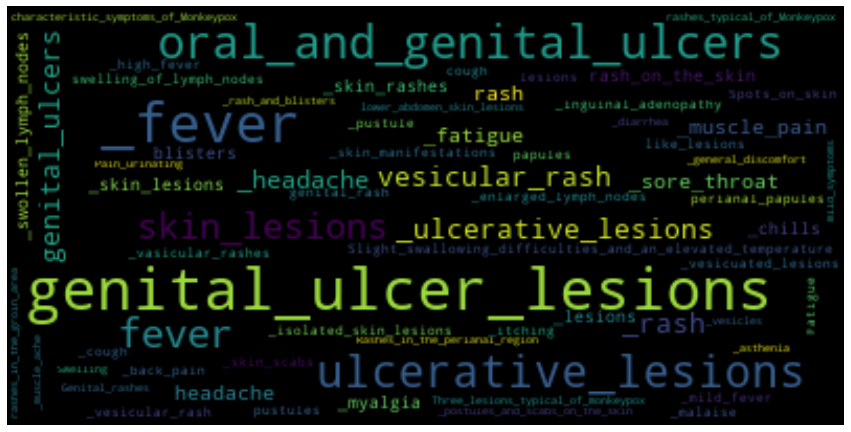

In [251]:
word_cloud2 = WordCloud(collocations = False, background_color = 'black').generate(text)
plt.figure(figsize = (15,8))
plt.imshow(word_cloud2, interpolation='bilinear')

plt.axis("off")

plt.show()

<h1></h1>

<a id='Reference'></a>
<h2 style="color:#0066ff">Reference</h2>

*  https://www.kaggle.com/code/ayushv322/monkeypox-eda-and-modelling-for-beginners/notebook
*  https://plotly.com/python/

<a id='Thank_you'></a>
# Thank You........😊
## Please 👍 and 💬 If you like my Analysis

<hr>

🔝[Back to Top](#Back_to_Top)🔝